# Homework 3

In [2]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 1.0

All of the exercises in 1. are based on the `class.csv` dataset


## 1.1

Perform EDA on the dataset. Describe what you are seeing. Clean the data

   age          job  marital          education  default housing loan  \
0   44  blue-collar  married           basic.4y  unknown     yes   no   
1   53   technician  married            unknown       no      no   no   
2   28   management   single  university.degree       no     yes   no   
3   39     services  married        high.school       no      no   no   
4   55      retired  married           basic.4y       no     yes   no   

    contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0  cellular   aug         thu  ...         1    999         0  nonexistent   
1  cellular   nov         fri  ...         1    999         0  nonexistent   
2  cellular   jun         thu  ...         3      6         2      success   
3  cellular   apr         fri  ...         2    999         0  nonexistent   
4  cellular   aug         fri  ...         1      3         1      success   

  emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  nr_employed  y  
0          1.4   

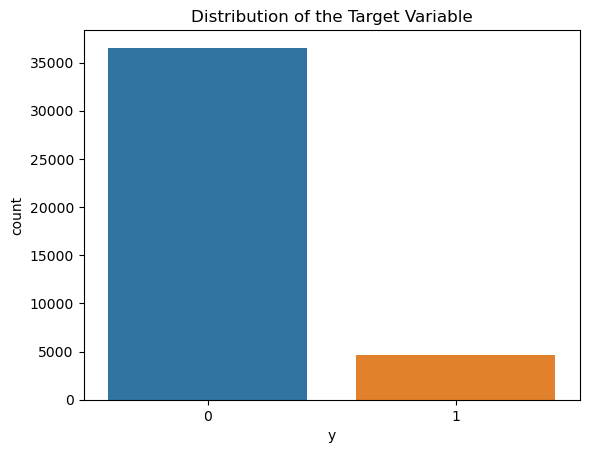

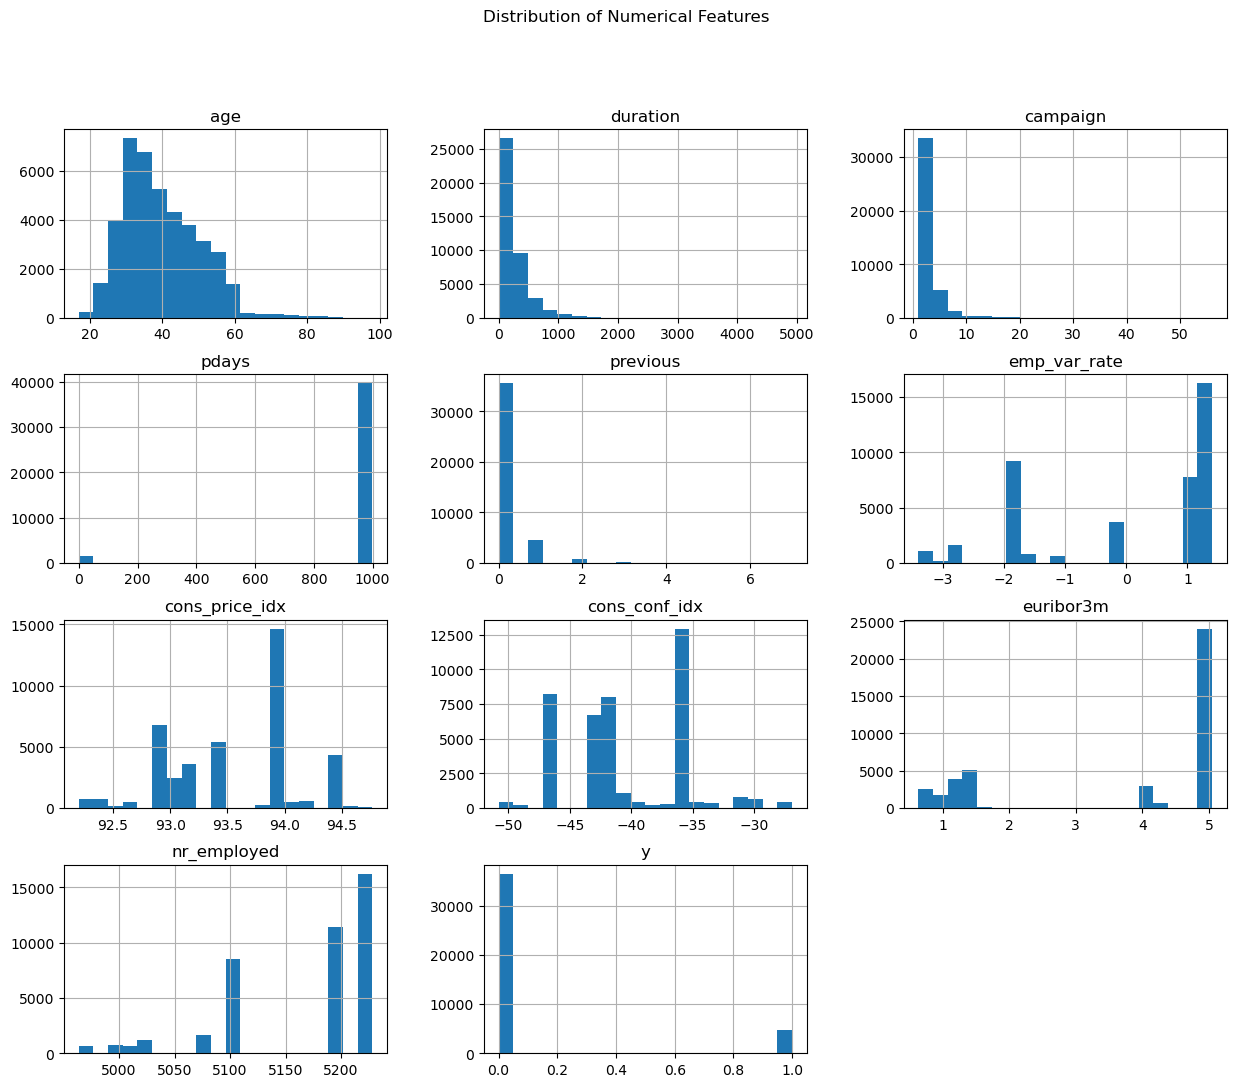

C:\Users\danie\AppData\Local\Temp\ipykernel_20996\204345507.py:27: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


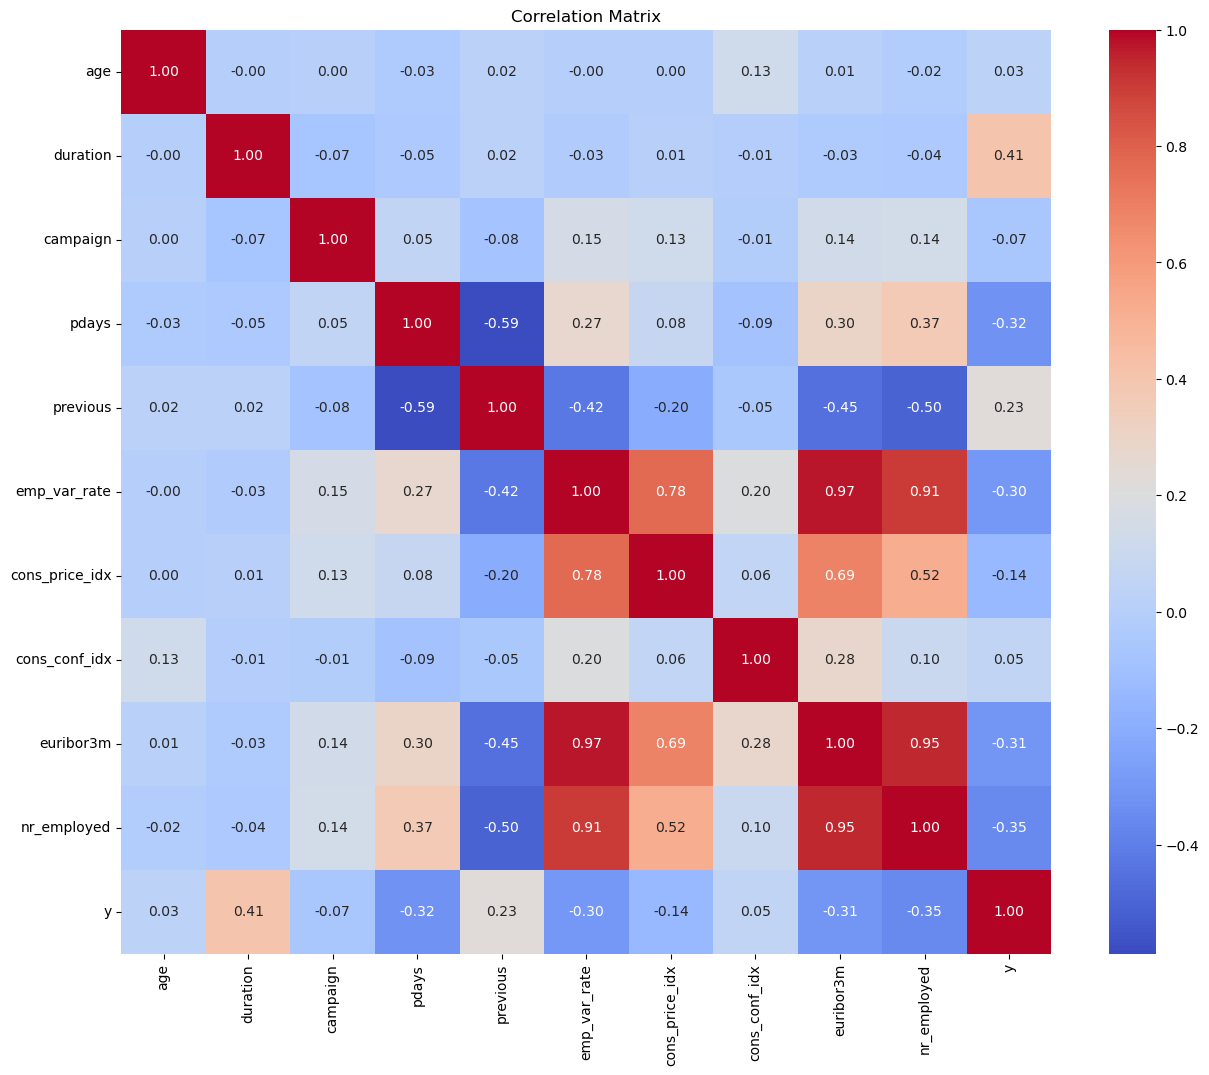

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "class.csv"  # Adjust the path if the file is in a different location
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())

# Summary statistics for numerical features
print(df.describe())

# Distribution of the target variable
sns.countplot(x='y', data=df)
plt.title('Distribution of the Target Variable')
plt.show()

# Distribution of numerical features
df.hist(figsize=(15, 12), bins=20)
plt.suptitle('Distribution of Numerical Features')
plt.show()

# Relationship between features and the target variable
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Description 

General Overview:

The dataset contains 41,188 records with 21 columns.
The average age of the individuals in the dataset is around 40 years.
The average call duration is approximately 258 seconds, with a maximum call duration of 4,918 seconds.
The average number of contacts during the campaign is around 2.57.
Target Variable:

The target variable y represents whether a client subscribed to a term deposit. The majority of instances have y=0 (did not subscribe), as indicated by the countplot.
Numerical Features Distribution:

The histograms provide insights into the distribution of numerical features like age, duration, campaign, pdays, previous, emp_var_rate, cons_price_idx, cons_conf_idx, euribor3m, and nr_employed.
Correlation Matrix:

The correlation matrix heatmap shows the correlation between numerical features. For example, there is a strong positive correlation between euribor3m and emp_var_rate.


# Data cleaning

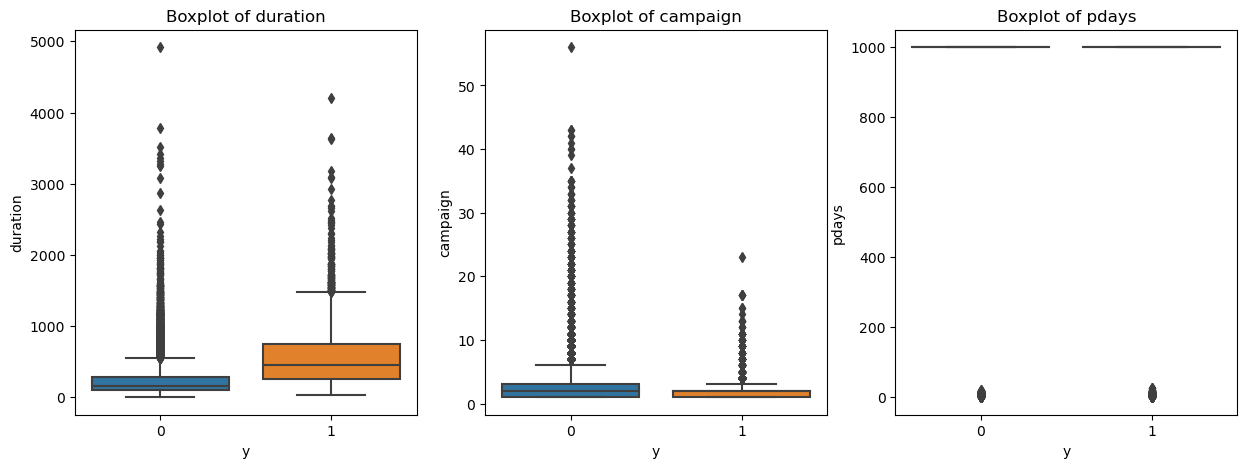

Missing Values:
 age                              0
duration                         0
campaign                         0
pdays                            0
previous                         0
emp_var_rate                     0
cons_price_idx                   0
cons_conf_idx                    0
euribor3m                        0
nr_employed                      0
y                                0
job_blue-collar                  0
job_entrepreneur                 0
job_housemaid                    0
job_management                   0
job_retired                      0
job_self-employed                0
job_services                     0
job_student                      0
job_technician                   0
job_unemployed                   0
job_unknown                      0
marital_married                  0
marital_single                   0
marital_unknown                  0
education_basic.6y               0
education_basic.9y               0
education_high.school            0
edu

In [3]:
# Handling Outliers
# Checking for outliers in 'duration', 'campaign', and 'pdays'
outliers_cols = ['duration', 'campaign', 'pdays']

# Display boxplots for outliers detection
plt.figure(figsize=(15, 5))
for i, col in enumerate(outliers_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='y', y=col, data=df)
    plt.title(f'Boxplot of {col}')
plt.show()

# Handling Categorical Variables
# One-hot encoding categorical variables
df = pd.get_dummies(df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'], drop_first=True)

# Handling Missing Values
# Checking for missing values in the dataset
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# If there are any missing values, decide on an appropriate strategy (e.g., imputation or removal)

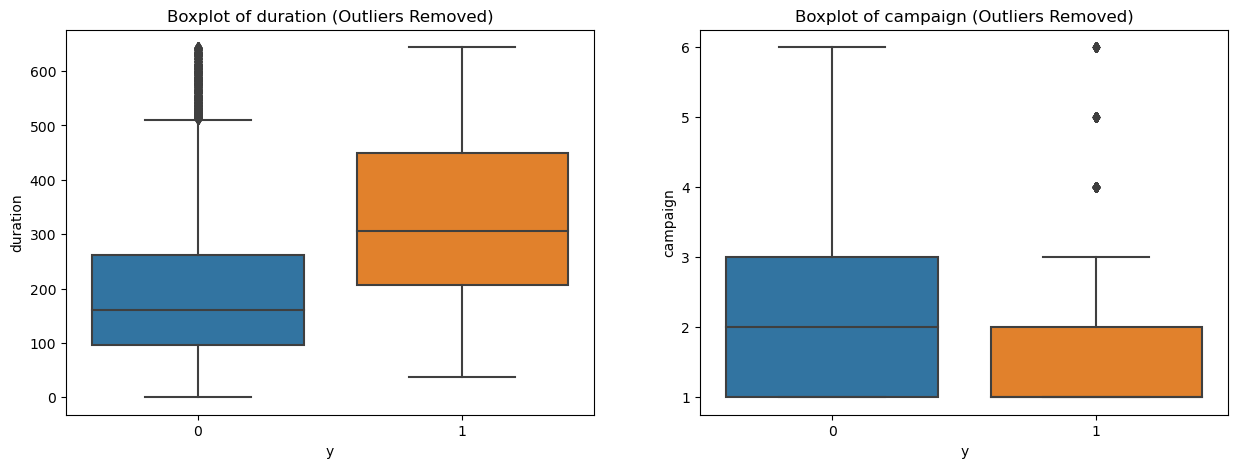

In [5]:
# Handling Outliers - Removing outliers from 'duration' and 'campaign' only
outliers_cols_no_pdays = ['duration', 'campaign']

# Remove outliers for 'duration' and 'campaign'
df_cleaned_no_pdays = df.copy()
for col in outliers_cols_no_pdays:
    df_cleaned_no_pdays = remove_outliers(df_cleaned_no_pdays, col)

# Display boxplots after removing outliers for 'duration' and 'campaign'
plt.figure(figsize=(15, 5))
for i, col in enumerate(outliers_cols_no_pdays, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(x='y', y=col, data=df_cleaned_no_pdays)
    plt.title(f'Boxplot of {col} (Outliers Removed)')
plt.show()

In [10]:
from pathlib import Path

# specifying file name
file = Path('data').joinpath('class.csv')

# setting pandas print options
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

# reading the file into Python
campaign = pd.read_csv(file)


# outputting the first ten rows of the dataset
campaign.head(n = 10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
5,30,management,divorced,basic.4y,no,yes,no,cellular,jul,tue,68,8,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0
6,37,blue-collar,married,basic.4y,no,yes,no,cellular,may,thu,204,1,999,0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1,0
7,39,blue-collar,divorced,basic.9y,no,yes,no,cellular,may,fri,191,1,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
8,36,admin.,married,university.degree,no,no,no,cellular,jun,mon,174,1,3,1,success,-2.9,92.963,-40.8,1.266,5076.2,1
9,27,blue-collar,single,basic.4y,no,yes,no,cellular,apr,thu,191,2,999,1,failure,-1.8,93.075,-47.1,1.410,5099.1,0


In [11]:
campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [12]:
campaign.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
unique,NaN,12,4,8,3,3,3,2,10,5,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,NaN,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,NaN,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,NaN
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.285010,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259.279249,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.000000,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.000000,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,319.000000,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000


In [13]:
campaign['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [14]:
count_no_sub = len(campaign[campaign['y']==0])
count_sub = len(campaign[campaign['y']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print(f"Without Subscription is {pct_of_no_sub*100:.2f}%")
pct_of_sub = count_sub/(count_no_sub+count_sub)
print(f"With Subscription {pct_of_sub*100:.2f}%")

Without Subscription is 88.73%
With Subscription 11.27%


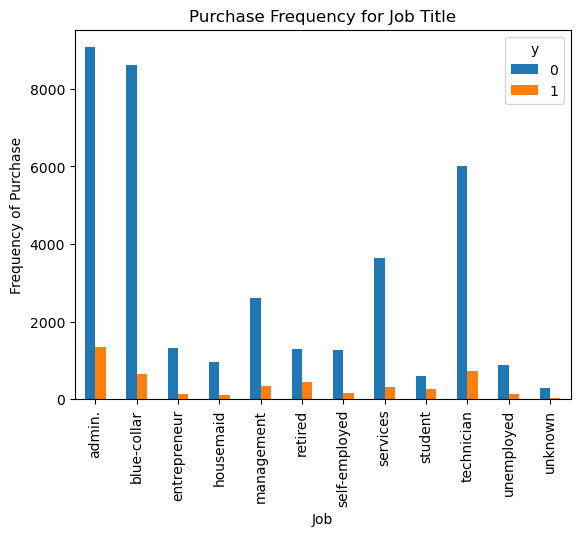

In [15]:
# look at purchase frequency by Job title
%matplotlib inline
pd.crosstab(campaign.job,campaign.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

# Splitting data

In [17]:
campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [58]:
# can only use numerical data with LogReg

# x-variables
x_var = ['age',
         #'job',
         #'marital',
         #'education',
         #'default',
         #'housing',
         #'loan',
         #'contact',
         #'month',
         #'day_of_week',
         'duration',
         'campaign',
         'pdays',
         'previous',
         #'poutcome',
         'emp_var_rate',
         'cons_price_idx',
         'cons_conf_idx',
         'euribor3m',
         'nr_employed']

In [59]:
y_data = campaign.loc[ : , 'y']
x_data = campaign.loc[ : , x_var]

In [60]:
x_train, x_test, y_train, y_test = train_test_split(
            x_data, # x-variables (can change this)
            y_data, # y-variable  (can change this)
            test_size    = 0.25,
            random_state = 219)

## 1.2

Analyse the features for skewness and transform the highly skewed features. Retrain the modell and evaluate the difference.

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
# Model initialization
logreg = LogisticRegression()

In [63]:
# Fit the data(train the model)
logreg.fit(x_train, y_train)

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression()

In [64]:
# Predict
y_predicted = logreg.predict(x_test)

In [65]:
# model evaluation
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.91


In [66]:
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(y_test, y_predicted)
print(conf)

[[8914  245]
 [ 690  448]]


In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      9159
           1       0.65      0.39      0.49      1138

    accuracy                           0.91     10297
   macro avg       0.79      0.68      0.72     10297
weighted avg       0.90      0.91      0.90     10297



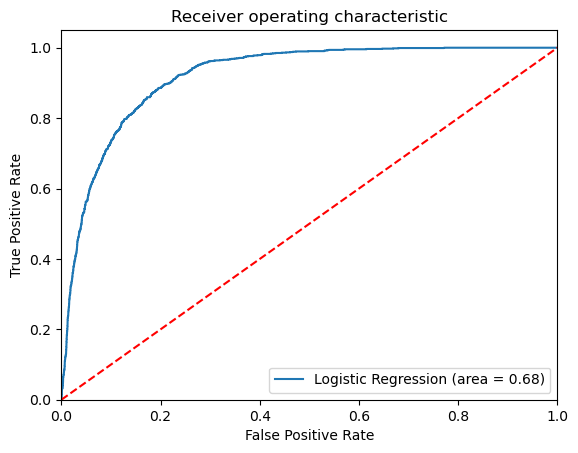

In [68]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## 1.3

Find the features that have a high amount of zero values. Engineer flag features (boolean) for all variables that have at least 100 observations in both the 'yes' and 'no' columns. Retrain the modell and evaluate the difference.

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset
path = Path("data") / Path("class.csv")
df = pd.read_csv(path)

# Separate features and target variable
X = df.drop(columns=['y'])
y = df['y']

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)  # drop_first=True to avoid multicollinearity

# Calculate percentage of zero values for each feature
zero_percentage = (X == 0).mean()

# Identify features with a high percentage of zero values
high_zero_features = zero_percentage[zero_percentage > 0.5].index

# Identify features with at least 100 observations in both 'yes' and 'no' columns
valid_features = []
for column in X.columns:
    if X[column].value_counts().get('yes', 0) >= 100 and X[column].value_counts().get('no', 0) >= 100:
        valid_features.append(column)

# Engineer flag features for valid features
for column in valid_features:
    X[column + '_flag'] = X[column].map({'yes': 1, 'no': 0})

# Separate features with flag features and target variable
X_flag = X[valid_features + [col + '_flag' for col in valid_features]]
X = pd.concat([X, X_flag], axis=1)

# Drop original categorical features
X.drop(columns=valid_features, inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Retrain the model (example with Logistic Regression)
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)

Accuracy on test set: 0.9065307113377034


STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


## 1.4

Encode the categorical features. Retrain the model and evaluate the difference.

In [71]:
categorical = df.select_dtypes(include='category').columns

label_encoding_mapping = {}

for column in categorical:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    
    label_encoding_mapping[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Rename categorical columns
df.rename(columns={col: col + '_encoded' for col in categorical}, inplace=True)

In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
path = Path("data") / Path("class.csv")
df = pd.read_csv(path)

# Separate features and target variable
X = df.drop(columns=['y'])
y = df['y']

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)  # drop_first=True to avoid multicollinearity

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Retrain the model (example with Logistic Regression)
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)

Accuracy on test set: 0.9065307113377034


STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


## 1.5
Implement a Scaled version with all the engineered features. Retrain the model and evaluate the results.

In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
path = Path("data") / Path("class.csv")
df = pd.read_csv(path)

# Separate features and target variable
X = df.drop(columns=['y'])
y = df['y']

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)  # drop_first=True to avoid multicollinearity

# Engineer flag features as needed

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Retrain the model (example with Logistic Regression)
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)

Accuracy on test set: 0.9078659868900218


## 1.6
Select a good featureset manually. Retrain the model and evaluate the results.

In [74]:
features = ['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact', 'poutcome', 'previous', 'emp_var_rate', 'euribor3m']

X = df[features]
y = df['y']

X = pd.get_dummies(X, drop_first=True)  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Retrain the model (example with Logistic Regression)
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)

Accuracy on test set: 0.8964554503520272


STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


## 1.7
Create engineered features and add them. Experiment with best feature combination. Retrain the model and evaluate the results.

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
path = Path("data") / Path("class.csv")
df = pd.read_csv(path)

# Engineering Age Group
bins = [18, 30, 40, 50, 60, 100]
labels = ['18-30', '30-40', '40-50', '50-60', '60+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Engineering Marital Status Group
marital_mapping = {'married': 'married', 'single': 'single', 'divorced': 'divorced'}
df['marital_status_group'] = df['marital'].map(marital_mapping)

# Engineering Job Type Group
job_mapping = {'admin.': 'admin', 'blue-collar': 'blue-collar', 'entrepreneur': 'entrepreneur',
               'housemaid': 'housemaid', 'management': 'management', 'retired': 'retired',
               'self-employed': 'self-employed', 'services': 'services', 'student': 'student',
               'technician': 'technician', 'unemployed': 'unemployed', 'unknown': 'unknown'}
df['job_type_group'] = df['job'].map(job_mapping)

# Engineering Education Level Group
education_mapping = {'basic.4y': 'basic', 'basic.6y': 'basic', 'basic.9y': 'basic',
                     'high.school': 'high.school', 'illiterate': 'illiterate',
                     'professional.course': 'professional.course', 'university.degree': 'university.degree',
                     'unknown': 'unknown'}
df['education_level_group'] = df['education'].map(education_mapping)

# Encoding new engineered features

# Encoding 'age_group' using LabelEncoder
age_group_encoder = LabelEncoder()
df['age_group_encoded'] = age_group_encoder.fit_transform(df['age_group'])

# Encoding 'marital_status_group' using LabelEncoder
marital_encoder = LabelEncoder()
df['marital_status_group_encoded'] = marital_encoder.fit_transform(df['marital_status_group'])

# Encoding 'job_type_group' using LabelEncoder
job_encoder = LabelEncoder()
df['job_type_group_encoded'] = job_encoder.fit_transform(df['job_type_group'])

# Encoding 'education_level_group' using LabelEncoder
education_encoder = LabelEncoder()
df['education_level_group_encoded'] = education_encoder.fit_transform(df['education_level_group'])

# Selecting features for the model
features = ['age_group_encoded', 'marital_status_group_encoded', 'job_type_group_encoded', 'education_level_group_encoded']

# Separate features and target variable
X = df[features]
y = df['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Retrain the model (example with Logistic Regression)
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)

Accuracy on test set: 0.8855304685603301


## 1.8

Put it all together. Create the best logistic regression model for this dataset.

In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
path = Path("data") / Path("class.csv")
df = pd.read_csv(path)

# Feature Engineering
bins = [18, 30, 40, 50, 60, 100]
labels = ['18-30', '30-40', '40-50', '50-60', '60+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Encoding new engineered features
age_group_encoder = LabelEncoder()
df['age_group_encoded'] = age_group_encoder.fit_transform(df['age_group'])

# Selecting features for the model
features = ['age_group_encoded', 'marital', 'education', 'housing', 'loan', 'contact', 'poutcome', 'previous', 'emp_var_rate', 'euribor3m']

# Separate features and target variable
X = df[features]
y = df['y']

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)  # drop_first=True to avoid multicollinearity

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Retrain the model (Logistic Regression)
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)

Accuracy on test set: 0.8965768390386016


## 1.9

Try the same with a decision tree classifier.  Retrain the model and evaluate the results.

In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
path = Path("data") / Path("class.csv")
df = pd.read_csv(path)

# Feature Engineering
bins = [18, 30, 40, 50, 60, 100]
labels = ['18-30', '30-40', '40-50', '50-60', '60+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Encoding new engineered features
age_group_encoder = LabelEncoder()
df['age_group_encoded'] = age_group_encoder.fit_transform(df['age_group'])

# Selecting features for the model
features = ['age_group_encoded', 'marital', 'education', 'housing', 'loan', 'contact', 'poutcome', 'previous', 'emp_var_rate', 'euribor3m']

# Separate features and target variable
X = df[features]
y = df['y']

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)  # drop_first=True to avoid multicollinearity

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Retrain the model (Decision Tree Classifier)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)

Accuracy on test set: 0.8703568827385287


## 2.0
Retrieve daily weather data from meteostat https://dev.meteostat.net/python/ for the last 20 years

In [42]:
pip install meteostat

  Obtaining dependency information for meteostat from https://files.pythonhosted.org/packages/23/93/0d277de2b38238072b850e33fbd94e230951f2e5d7ac140ae221a05215b0/meteostat-1.6.7-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [88]:
# Set the location for boston (latitude, longitude)
boston_location = Point(42.3601, -71.0589)

# Specify the start and end dates
start_date = datetime.now() - timedelta(days=365*20)  
end_date = datetime.now()

# Retrieve  weather data
data = Daily(boston_location, start=start_date, end=end_date)
weather = data.fetch()

# Print the retrieved data
weather.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2004-02-19,1.1,-3.9,6.1,0.0,0.0,318.0,26.3,NaN,1007.1,0.0
2004-02-20,1.1,-2.2,4.4,0.0,0.0,14.0,14.0,NaN,1013.3,0.0
2004-02-21,2.8,0.6,5.0,0.3,0.0,NaN,15.1,NaN,1001.4,0.0
2004-02-22,3.3,0.6,5.6,0.0,0.0,311.0,20.5,NaN,1009.9,0.0
2004-02-23,3.3,-1.1,7.8,0.0,0.0,312.0,20.5,NaN,1019.2,0.0


In [82]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7300 entries, 2004-02-19 to 2024-02-13
Freq: D
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tavg    7289 non-null   float64
 1   tmin    7300 non-null   float64
 2   tmax    7300 non-null   float64
 3   prcp    7300 non-null   float64
 4   snow    6831 non-null   float64
 5   wdir    5274 non-null   float64
 6   wspd    7300 non-null   float64
 7   wpgt    0 non-null      float64
 8   pres    7152 non-null   float64
 9   tsun    5658 non-null   float64
dtypes: float64(10)
memory usage: 627.3 KB


## 2.1
Analyse daily windspeeds similar to what we did in class for precipitations

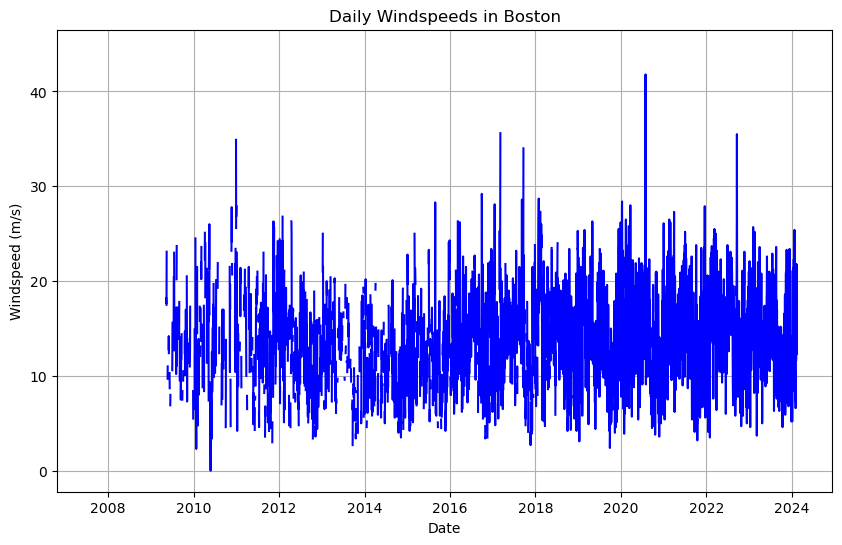

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from meteostat import Point, Daily

# Set the location for Boston (latitude, longitude)
boston_location = Point(42.3601, -71.0589)

# Specify the start and end dates
start_date = datetime.now() - timedelta(days=365*20)
end_date = datetime.now()

# Retrieve daily weather data
data = Daily(punta_cana_location, start=start_date, end=end_date)
weather = data.fetch()

# Extract windspeed data
windspeeds = weather['wspd']

# Plot windspeeds over time
plt.figure(figsize=(10, 6))
plt.plot(windspeeds.index, windspeeds, color='blue')
plt.title('Daily Windspeeds in Boston')
plt.xlabel('Date')
plt.ylabel('Windspeed (m/s)')
plt.grid(True)
plt.show()

## 2.2

Create a forecasting model to forecast monthly average windspeed

Mean Squared Error: 4.272139271697399


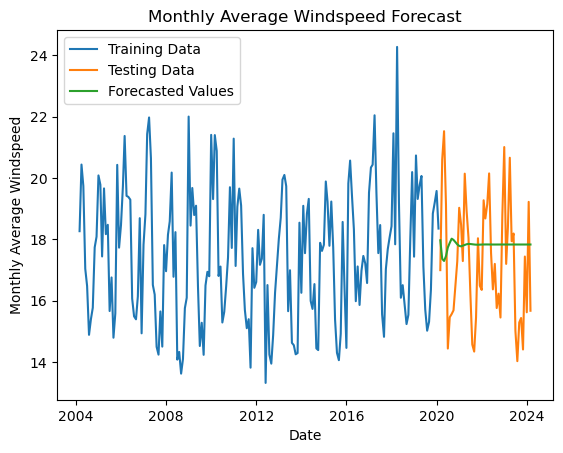

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Resample the data to get monthly averages
monthly_avg_windspeed = weather['wspd'].resample('M').mean()

# Split the data into training and testing sets
train_size = int(len(monthly_avg_windspeed) * 0.8)  # 80% training data, 20% testing data
train_data, test_data = monthly_avg_windspeed[:train_size], monthly_avg_windspeed[train_size:]

# Fit ARIMA model
model = ARIMA(train_data, order=(5,1,0))  # ARIMA(p,d,q) where p is the order of the autoregressive term, d is the degree of differencing, and q is the order of the moving average term
arima_model = model.fit()

# Forecast
forecasted_values = arima_model.forecast(steps=len(test_data))

# Compute Mean Squared Error
mse = mean_squared_error(test_data.values, forecasted_values)
print('Mean Squared Error:', mse)

# Plotting
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Testing Data')
plt.plot(test_data.index, forecasted_values, label='Forecasted Values')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Monthly Average Windspeed')
plt.title('Monthly Average Windspeed Forecast')
plt.show()